In [1]:
import requests  
from bs4 import BeautifulSoup  
from openpyxl import Workbook  
import time  
import random  
  
# 定义URL和请求头  
url = 'https://movie.douban.com/subject/3878007/comments?start=0&limit=20&sort=new_score&status=P'  
headers = {  
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'  
}  
  
# 发送请求并获取HTML内容  
response = requests.get(url, headers=headers)  
html = response.text  
  
# 使用BeautifulSoup解析HTML  
soup = BeautifulSoup(html, 'lxml')  
comments = soup.find_all('span', class_='short')  
  
# 创建一个Excel工作簿和工作表  
wb = Workbook()  
ws = wb.active  
  
# 将评论写入Excel文件  
for comment in comments:  
    ws.append([comment.text])  
    time.sleep(random.random() * 3)  # 等待随机时间  
  
# 保存Excel文件  
wb.save('comment.xlsx')

In [4]:
import jieba #引入jieba库用于分词

In [5]:
with open('C:/Users/86187/Desktop/8.txt', 'r', encoding='UTF-8') as novelFile:
    novel = novelFile.read()
# print(novel)
#stopwords = [line.strip() for line in open('stop.txt', 'r', encoding='UTF-8').readlines()]
with open("C:/Users/86187/Desktop/ham_spam/data/stop_words.utf8", encoding="utf8")as f:
    stopword_list = f.readlines()
novelList = list(jieba.lcut(novel))
novelDict = {}


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86187\AppData\Local\Temp\jieba.cache
Loading model cost 0.874 seconds.
Prefix dict has been built successfully.


In [6]:
# 统计出词频字典
for word in novelList:
    if word not in stopword_list:
            # 不统计字数为一的词
            if len(word) == 1:
                continue
            else:
                novelDict[word] = novelDict.get(word, 0) + 1


In [7]:
# 对词频进行排序
novelListSorted = list(novelDict.items())
novelListSorted.sort(key=lambda e: e[1], reverse=True)

In [8]:
# 打印前10词频
topWordNum = 0
for topWordTup in novelListSorted[:10]:
    print(topWordTup)

('海王', 15)
('海底', 12)
('DC', 10)
('世界', 8)
('故事', 7)
('dc', 6)
('一会儿', 6)
('指环王', 5)
('最后', 5)
('一个', 5)


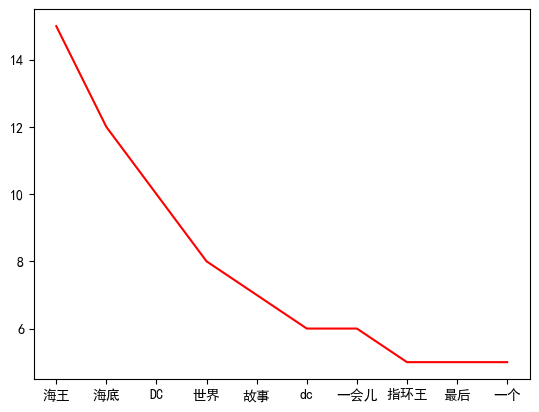

In [9]:
from matplotlib import pyplot as plt
# 通过pyplot的字典rcParams设置参数 显示中文 
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

x = [c for c,v in novelListSorted]
y = [v for c,v in novelListSorted]
plt.plot(x[:10],y[:10],color='r')
plt.show()

In [14]:
import jieba.analyse as anls #关键词提取
 

 
sent = open("8.txt", 'r', encoding='UTF-8').read()
 
#基于tf-idf提取关键词
print("基于TF-IDF提取关键词结果：")
for x, w in anls.extract_tags(sent, topK=20, withWeight=True):
    print('%s %s' % (x, w))
 
#基于textrank提取关键词
print("基于textrank提取关键词结果：")
for x, w in anls.textrank(sent, withWeight=True):
    print('%s %s' % (x, w))

基于TF-IDF提取关键词结果：
海王 0.13196257425693275
DC 0.12557528889600839
海底 0.09044929424130252
dc 0.07534517333760504
指环王 0.07300776077731093
温子仁 0.06278764444800419
阿凡 0.05840620862184874
亚特兰蒂斯 0.05164386445168067
漫威 0.05023011555840336
票房 0.04716752482221639
故事 0.04500275414757353
恐怖片 0.04380465646638655
海沟 0.03918473392214286
一会儿 0.03892861131491596
剧情 0.03839707444193278
跑酷 0.03767258666880252
奇观 0.03670542721869748
世界 0.03670192777789916
电影 0.03496785572048319
黑豹 0.033923897382352936
基于textrank提取关键词结果：
世界 1.0
故事 0.9716437776591116
没有 0.8728709143653068
海沟 0.7953854134875781
英雄 0.7225898909700822
海洋 0.693032038267715
票房 0.6733817428083423
恐怖片 0.6248485004362812
毫无 0.605538705933448
电影 0.5995269627651929
角色 0.5830740840181128
剧情 0.5504102862438035
动作 0.5173286126850138
女侠 0.5081278613622696
场景 0.5050665921349101
观众 0.4928971968931531
告诉 0.48625470499133233
觉得 0.4790408114577672
年度 0.47563582012892824
装备 0.47323316312666824


In [15]:
import jieba
 
sent = open("8.txt", 'r', encoding='UTF-8').read()
 
seg_list1 = jieba.cut(sent, cut_all=True)
print('全模式：', '/'.join(seg_list1))
 
seg_list2 = jieba.cut(sent, cut_all=False)
print('精确模式：', '/'.join(seg_list2))
 
seg_list3 = jieba.cut(sent)
print('默认精确模式：', '/'.join(seg_list3))
 
seg_list4 = jieba.cut_for_search(sent)
print('搜索引擎模式：', '/'.join(seg_list4))

全模式： "/精美/精美绝伦/绝伦/的/水下/下世/世界/，/宏伟/瑰丽/的/海底/奇观/，/堪称/“/海底/《/阿/凡/达/》，/水下/潘多拉/多拉/”。/
//亚特/亚特兰/亚特兰蒂斯/兰蒂斯/蒂斯/的/史诗/级/战争/争气/气势/气势磅礴/磅礴/，/媲美/《/星球/星球大战/大战/》/和/《/指环/指环王/》。/
//动作/作戏/登峰/登峰造极/，/拳拳/到/肉/，/让/人/再次/感受/《/钢铁/之躯/》/的/震撼/。/
//飞船/追逐/更是/眼花/眼花缭乱/缭乱/，/引人/引人入胜/，/仿佛/把/《/速度/与/激情/》/搬到/了/海底/。/
//寻找/三叉/三叉戟/的/探险/之/旅/同样/其乐无穷/无穷/，/妙趣/妙趣横生/横生/，/又/是/《/夺宝/夺宝奇兵/奇兵/》/的/再现/。/
//影片/核心/又/回归/归到/对/家庭/的/探索/和/对/自我/的/肯定/，/承载/着/成长/和/母爱/，/自信/和亲/亲情/。/
//最后/一个/镜头/让/人/热泪/热泪盈眶/盈眶/，/正如/托马/托马斯/终于/等到/与/妻子/重逢/，/我们/也/终于/等到/DC/近几年/几年/最优/优秀/的/电影/。/
//温/子/仁/如/卡梅隆/和/彼得/·/杰克/杰克逊/克逊/附体/，/拍/了/一部/动作/、/冒险/、/奇幻/、/超英/等/元素/的/集大成/集大成者/大成/大成者/。/
//它/是/《/黑暗/骑士/》/之后/最好/的/超级/英雄/电影/之一/，/从此/影/史/将/记住/《/海王/》/的/名字/。"/
//一出/爽/片/，/告诉/D/家/还是/别/玩/深沉/，/适当/鸡汤/、/疯狂/爆米花/，/这/不/就/挺/好/。/放/几个/微/博/号/，/拔高/至/电影/电影史/，/完全/不必/——/太/像/一堆/水炮/。/电影/算/好看/啦/，/问题/有/超级/英雄/的/自身/软肋/，/像/除了/不想/当/海王/，/就/没有/有性/性格/毛病/了/。/温/子/仁/花/大气/气力/构筑/的/不同/同场/场景/，/确实/花哨/诡奇/，/但/始终/难以/统一/，/比如/那段/跑/酷/的/必要/必要性/，/比如/两次/大场/场面/，/全部/靠/鱼/海/对决/，/看/多/了/还是/一个/一个样/。/角色/参与/参与感/太弱/，/尽管/虾兵蟹将/死/那么/多/，/who// //cares

In [11]:
from wordcloud import WordCloud,ImageColorGenerator
import jieba
import matplotlib.pyplot as plt 
from imageio import imread

C:\Users\86187\AppData\Local\Temp\ipykernel_21964\3286380592.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  bg_pic = imread('3.jpg')


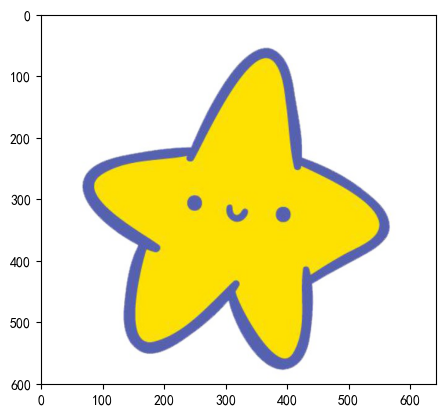

In [12]:
#读入背景图片
bg_pic = imread('3.jpg')
plt.imshow(bg_pic)


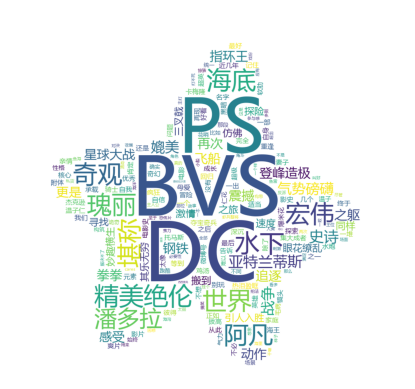

In [13]:
#生成词云图片font_path='msyh.ttc'支持中文mask=bg_pic,
wordcloud = WordCloud(mask=bg_pic,background_color='white',scale=1.5,font_path=r'msyh.ttc').generate(' '.join(novelDict.keys()))
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()